# 1. Pendahuluan

In [1]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt

# Data Preparation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Data Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [2]:
file_path = os.path.join("data", "prepared_leads_scoring.csv")
df = pd.read_csv(file_path)

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Last Activity Category
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,0,0,Modified,Good
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,Good
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,0,1,Email Opened,Good
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,Not Specified,Jakarta,02.Medium,01.High,13.0,17.0,0,0,Modified,Bad
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,Not Specified,Jakarta,02.Medium,01.High,15.0,18.0,0,0,Modified,Neutral


In [3]:
# Identifikasi categorical dan numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove `Converted` kolom
numerical_cols.remove('Converted')
numerical_cols.remove('Lead Number')
categorical_cols.remove('Prospect ID')

# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorik
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Specified')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# menggabungkan transformer menjadi preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X = df.drop(columns=['Converted', 'Prospect ID', 'Lead Number'])
y = df['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessor to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Displaying the shape of the processed data
X_train_preprocessed.shape, X_test_preprocessed.shape

((7392, 123), (1848, 123))

# 2. Modelling

In [4]:
# Membuat model Logistic Regression dengan iterasi yang tinggi (untuk mencapai konvergensi model)
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_preprocessed, y_train)

# Memprediksi dan mengevaluasi model
y_pred_logreg = logreg.predict(X_test_preprocessed)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1107
           1       0.95      0.90      0.92       741

    accuracy                           0.94      1848
   macro avg       0.94      0.93      0.94      1848
weighted avg       0.94      0.94      0.94      1848



In [5]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_preprocessed, y_train)

# Memprediksi dan mengevaluasi model
y_pred_dtree = dtree.predict(X_test_preprocessed)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1107
           1       0.90      0.90      0.90       741

    accuracy                           0.92      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.92      0.92      0.92      1848



In [6]:
# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_preprocessed, y_train)

# Memprediksi dan mengevaluasi model
y_pred_rf = rf.predict(X_test_preprocessed)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1107
           1       0.94      0.91      0.93       741

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



In [7]:
# Menghitung F1 Score untuk Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"F1 Score for Logistic Regression\t: {f1_logreg:.2f}")

# Menghitung F1 Score untuk Decision Tree
f1_dtree = f1_score(y_test, y_pred_dtree)
print(f"F1 Score for Decision Tree\t\t: {f1_dtree:.2f}")

# Menghitung F1 Score untuk Random Forest
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score for Random Forest\t\t: {f1_rf:.2f}")

F1 Score for Logistic Regression	: 0.92
F1 Score for Decision Tree		: 0.90
F1 Score for Random Forest		: 0.93


# 3. Evaluation

In [8]:
# Membuat model RandomForest
rf = RandomForestClassifier(random_state=42)

# Menentukan grid hyperparameter
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 101, 10),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'bootstrap': [True, False]
}

# Mengatur RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Melatih RandomizedSearchCV pada data latih
rf_random_search.fit(X_train_preprocessed, y_train)

# Menemukan hyperparameter terbaik
best_params = rf_random_search.best_params_
print(f"Best Parameters: {best_params}")

# Mengevaluasi model dengan hyperparameter terbaik
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test_preprocessed)
print("Random Forest Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_rf_best))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\ziyads059336\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ziyads059336\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ziyads059336\Anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\ziyads059336\Anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ziya

Best Parameters: {'n_estimators': 1000, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
Random Forest Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1107
           1       0.95      0.91      0.93       741

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



In [9]:
# Mengambil parameter terbaik
best_params = rf_random_search.best_params_

# Membuat model RandomForest baru dengan parameter ini
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Melatih model pada data latihan
best_rf_model.fit(X_train_preprocessed, y_train)

# Melakukan prediksi pada data uji
y_pred_best_rf = best_rf_model.predict(X_test_preprocessed)

# Menghitung skor F1
f1_score_best_rf = f1_score(y_test, y_pred_best_rf)
print(f"Skor F1 dengan Parameter Terbaik: {f1_score_best_rf:.2f}")

Skor F1 dengan Parameter Terbaik: 0.93


In [10]:
def get_feature_names(column_transformer):
    """Get feature names from a ColumnTransformer"""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the pipeline step has 'get_feature_names_out' method
            feature_names = pipe.get_feature_names_out(features)
        else:
            # Otherwise, use the original feature names
            feature_names = features
        output_features.extend(feature_names)

    return output_features

In [11]:
# Inisialisasi daftar untuk menyimpan nama fitur
feature_names = []

# Loop melalui setiap transformer dalam ColumnTransformer
for transformer in preprocessor.transformers_: # karena kita tidak memiliki 'remainder'
    transformer_name, transformer_instance, column_names = transformer

    # Jika transformer memiliki metode 'get_feature_names_out', gunakan itu
    if hasattr(transformer_instance, 'named_steps'):
        for k, v in transformer_instance.named_steps.items():
            if k in ['scaler', 'onehot']:
                names = transformer_instance.named_steps[k].get_feature_names_out(column_names)
        feature_names.extend(names)
    else:
        # Jika tidak, hanya gunakan nama kolom asli
        feature_names.extend(column_names)

# Sekarang feature_names harus berisi nama fitur yang benar setelah preprocessing

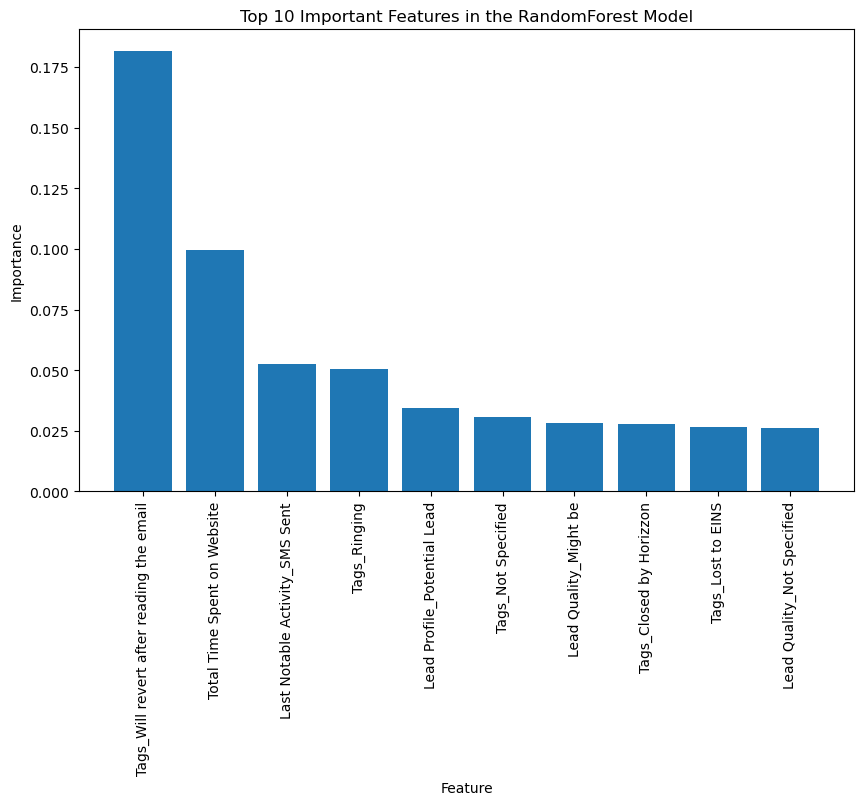

In [12]:
# Mendapatkan feature importances dari model RandomForest
importances = best_rf_model.feature_importances_

# Membuat pasangan fitur dan pentingnya, kemudian urutkan
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Mengambil 10 fitur teratas
top_10_feature_importances = feature_importances[:10]

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features in the RandomForest Model")
plt.bar(*zip(*top_10_feature_importances))
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

In [13]:
for a, b in top_10_feature_importances:
    print(a)

Tags_Will revert after reading the email
Total Time Spent on Website
Last Notable Activity_SMS Sent
Tags_Ringing
Lead Profile_Potential Lead
Tags_Not Specified
Lead Quality_Might be
Tags_Closed by Horizzon
Tags_Lost to EINS
Lead Quality_Not Specified


In [14]:
top_10_feature_importances

[('Tags_Will revert after reading the email', 0.18141346991610285),
 ('Total Time Spent on Website', 0.09972270012565215),
 ('Last Notable Activity_SMS Sent', 0.052620697512145556),
 ('Tags_Ringing', 0.05067578393910034),
 ('Lead Profile_Potential Lead', 0.0344642234175098),
 ('Tags_Not Specified', 0.030711800793458685),
 ('Lead Quality_Might be', 0.028148935633235284),
 ('Tags_Closed by Horizzon', 0.027857421493026346),
 ('Tags_Lost to EINS', 0.026382963310371627),
 ('Lead Quality_Not Specified', 0.026324876570961272)]

# Save Model

In [15]:
if not os.path.exists('model'):
    os.mkdir('model')
else:
    print('folder `model` already exists!')

# save the model
filename = os.path.join('model', 'best_rf_model.sav')
pickle.dump(best_rf_model, open(filename, 'wb'))

# save the preprocessor
filename = os.path.join('model', 'preprocessor.sav')
pickle.dump(preprocessor, open(filename, 'wb'))

print('berhasil menyimpan model terbaik dan preprocessornya')

folder `model` already exists!


berhasil menyimpan model terbaik dan preprocessornya
